C:\Users\Toshiba\AppData\Local\Temp\ipykernel_4496\2386421885.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = X[:,np.newaxis]


{'C': 100000, 'gamma': 0.005, 'kernel': 'rbf'}


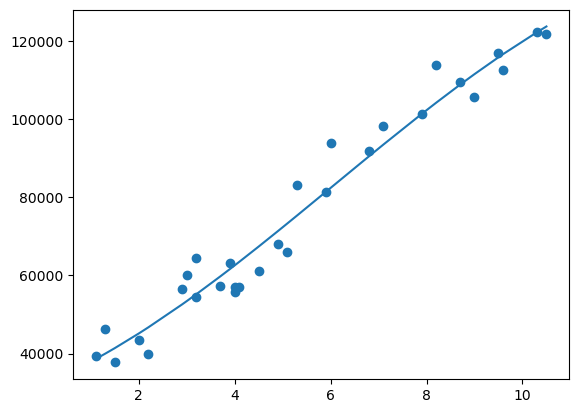

In [1]:
# Untuk latihan kali ini kita akan menggunakan grid search untuk mencari parameter terbaik pada sebuah model SVR. Dataset yang kita gunakan sama seperti di modul 3 yaitu dataset gaji. Pada latihan tersebut model belum mampu menyesuaikan pola pada data dengan baik. Tujuan kita adalah menggunakan grid search untuk mencari parameter yang lebih baik bagi model.
import pandas as pd

# membaca dataset dan mengubahnya menjadi dataframe
data = pd.read_csv('Salary_Data.csv')

import numpy as np

# memisahkan atribut dan label
X = data['YearsExperience']
y = data['Salary']

# mengubah bentuk atribut
X = X[:,np.newaxis]

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

# membangun model dengan parameter C, gamma dan kernel
model = SVR()
parameters = {
    'kernel' : ['rbf'],
    'C' : [1000, 10000, 100000],
    'gamma' : [0.5, 0.05, 0.005]
}
grid_search = GridSearchCV(model, parameters)

# melatih model dengan fungsi fit
grid_search.fit(X,y)

# menampilkan parameter terbaik dari objek grid_search
print(grid_search.best_params_)

# membuat model SVM baru dengan parameter terbaik hasil grid_search
model_baru = SVR(C=100000, gamma=0.005, kernel='rbf')
model_baru.fit(X,y)

# Visualisasikan SVR dengan parameter hasil grid search 
import matplotlib.pyplot as plt
plt.scatter(X,y)
plt.plot(X, model_baru.predict(X))